In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylot as plt
import seaborn as sb

%matplotlib inline


In [147]:
import pandas as pd


results = pd.read_csv(r'W:\Users\HP\OneDrive\Desktop\results.csv', 
                      names=['result_Id', 'race_Id', 'driver_Id', 'constructor_Id', 'number', 'grid', 'position', 'position_Text', 'position_Order', 'points', 'laps', 'time', 'milliseconds', 'fastest_Lap', 'rank', 'fastest_Lap_Time', 'fastest_Lap_Speed', 'status_Id'], 
                      header=None, 
                      encoding='ISO-8859-1')  # ou 'latin1'

races = pd.read_csv(r'C:\Users\HP\Downloads\races.csv', 
                    names=['race_Id', 'year', 'round', 'circuit_Id', 'name', 'date', 'time', 'url'], 
                    header=None, 
                    encoding='ISO-8859-1')

drivers = pd.read_csv(r'C:\Users\HP\Downloads\drivers.csv', 
                      names=['driver_Id', 'driver_Ref', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url'], 
                      header=None, 
                      encoding='ISO-8859-1')

constructors = pd.read_csv(r'W:\Users\HP\OneDrive\Desktop\constructors.csv', 
                           names=['constructor_Id', 'constructor_Ref', 'name', 'nationality', 'url'], 
                           header=None, 
                           encoding='ISO-8859-1')


print(results.head())
print(races.head())
print(drivers.head())
print(constructors.head())


  result_Id race_Id driver_Id constructor_Id  number  grid  position  \
0  resultId  raceId  driverId  constructorId  number  grid  position   
1         1      18         1              1      22     1         1   
2         2      18         2              2       3     5         2   
3         3      18         3              3       7     7         3   
4         4      18         4              4       5    11         4   

  position_Text position_Order  points  laps     time  milliseconds  \
0  positionText  positionOrder  points  laps     time  milliseconds   
1             1              1      10    58  34:50.6       5690616   
2             2              2       8    58    5.478       5696094   
3             3              3       6    58    8.163       5698779   
4             4              4       5    58   17.181       5707797   

  fastest_Lap  rank fastest_Lap_Time fastest_Lap_Speed status_Id  
0  fastestLap  rank   fastestLapTime   fastestLapSpeed  statusId  
1     

In [9]:
df = pd.merge(results, races[['race_Id','year','name','round']],on = 'race_Id',how='left')
df = pd.merge(df, drivers[['driver_Id','driver_Ref','nationality']],on = 'driver_Id',how='left')
df = pd.merge(df, constructors[['constructor_Id','name','nationality']],on = 'constructor_Id',how='left')


In [10]:
df.drop(['number','position','position_Text','laps','fastest_Lap','status_Id','result_Id','race_Id','driver_Id','constructor_Id'], axis=1, inplace= True)

In [17]:
df.rename(columns={
    'rank': 'fastest_Lap_rank',
    'name_x': 'gp_name',
    'nationality_x': 'driver_nationality',
    'name_y': 'constructor_name',
    'nationality_y': 'constructor_nationality',
    'driver_ref': 'driver'
}, inplace=True)

In [18]:
print(df.columns)

Index(['grid', 'position_Order', 'points', 'time', 'milliseconds',
       'fastest_Lap_rank', 'fastest_Lap_Time', 'fastest_Lap_Speed', 'year',
       'gp_nam', 'round', 'driver_Ref', 'driver_nationality',
       'constructor_name', 'constructor_nationality'],
      dtype='object')


In [20]:
df = df[['year', 'gp_nam', 'round', 'driver_Ref', 'constructor_name', 
          'grid', 'position_Order', 'points', 'time', 'milliseconds', 
          'fastest_Lap_rank', 'fastest_Lap_Time', 'fastest_Lap_Speed', 
          'driver_nationality', 'constructor_nationality']]


In [21]:
df= df[df['year']!=2019]

In [23]:
df = df.sort_values(by=['year','round','position_Order'], ascending = [False, True, True])

In [25]:
df.time = df.time.replace('\\N', np.nan)
df.milliseconds = df.milliseconds.replace('\\N', np.nan)
df.fastest_Lap_rank = df.fastest_Lap_rank.replace('\\N', np.nan)
df.fastest_Lap_Time = df.fastest_Lap_Time.replace('\\N', np.nan)
df.fastest_Lap_Speed = df.fastest_Lap_Speed.replace('\\N', np.nan)

In [28]:
df.fastest_Lap_Speed = pd.to_numeric(df.fastest_Lap_Speed, errors='coerce')
df.fastest_Lap_rank = pd.to_numeric(df.fastest_Lap_rank, errors='coerce')
df.milliseconds = pd.to_numeric(df.milliseconds, errors='coerce')

In [29]:
df.reset_index(drop=True, inplace=True)

In [30]:
print(df.shape)

(23778, 15)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23778 entries, 0 to 23777
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     23778 non-null  object 
 1   gp_nam                   23778 non-null  object 
 2   round                    23778 non-null  object 
 3   driver_Ref               23778 non-null  object 
 4   constructor_name         0 non-null      object 
 5   grid                     23778 non-null  object 
 6   position_Order           23778 non-null  object 
 7   points                   23778 non-null  object 
 8   time                     6005 non-null   object 
 9   milliseconds             6003 non-null   float64
 10  fastest_Lap_rank         5531 non-null   float64
 11  fastest_Lap_Time         5384 non-null   object 
 12  fastest_Lap_Speed        5382 non-null   float64
 13  driver_nationality       23778 non-null  object 
 14  constructor_nationalit

In [32]:
df.head(10)

,year,gp_nam,round,driver_Ref,constructor_name,grid,position_Order,points,time,milliseconds,fastest_Lap_rank,fastest_Lap_Time,fastest_Lap_Speed,driver_nationality,constructor_nationality
0,year,name,round,driverRef,NaN,grid,positionOrder,points,time,NaN,NaN,fastestLapTime,NaN,nationality,NaN
1,2017,Australian Grand Prix,1,vettel,NaN,2,1,25,24:11.7,5051672.0,3.0,01:26.6,220.351,German,NaN
2,2017,Australian Grand Prix,1,ocon,NaN,13,10,1,NaN,NaN,11.0,01:28.5,215.776,French,NaN
3,2017,Australian Grand Prix,1,hulkenberg,NaN,11,11,0,NaN,NaN,12.0,01:28.5,215.749,German,NaN
4,2017,Australian Grand Prix,1,giovinazzi,NaN,16,12,0,NaN,NaN,13.0,01:29.1,214.378,Italian,NaN
5,2017,Australian Grand Prix,1,vandoorne,NaN,18,13,0,NaN,NaN,15.0,01:29.4,213.448,Belgian,NaN
6,2017,Australian Grand Prix,1,alonso,NaN,12,14,0,NaN,NaN,17.0,01:30.1,211.938,Spanish,NaN
7,2017,Australian Grand Prix,1,kevin_magnussen,NaN,17,15,0,NaN,NaN,7.0,01:27.6,218.011,Danish,NaN
8,2017,Australian Grand Prix,1,stroll,NaN,20,16,0,NaN,NaN,14.0,01:29.4,213.569,Canadian,NaN
9,2017,Australian Grand Prix,1,ricciardo,NaN,0,17,0,NaN,NaN,16.0,01:29.4,213.431,Australian,NaN


In [33]:
print(df.isna().sum())


year                           0
gp_nam                         0
round                          0
driver_Ref                     0
constructor_name           23778
grid                           0
position_Order                 0
points                         0
time                       17773
milliseconds               17775
fastest_Lap_rank           18247
fastest_Lap_Time           18394
fastest_Lap_Speed          18396
driver_nationality             0
constructor_nationality    23778
dtype: int64


In [34]:
print(df['constructor_name'].unique())
print(df['time'].unique())
print(df['milliseconds'].unique())


[nan]
['time' '24:11.7' nan ... '51:17.4' '+1:18.6' '+1:35.6']
[      nan  5051672.  5061647. ... 10277400. 10356000. 10373000.]


In [37]:
print(df.dtypes)


year                        object
gp_nam                      object
round                       object
driver_Ref                  object
constructor_name            object
grid                        object
position_Order              object
points                      object
time                        object
milliseconds               float64
fastest_Lap_rank           float64
fastest_Lap_Time            object
fastest_Lap_Speed          float64
driver_nationality          object
constructor_nationality     object
dtype: object


In [38]:
df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)
df['round'] = pd.to_numeric(df['round'], errors='coerce').fillna(0).astype(int)
df['grid'] = pd.to_numeric(df['grid'], errors='coerce').fillna(0).astype(int)
df['position_Order'] = pd.to_numeric(df['position_Order'], errors='coerce').fillna(0).astype(int)

df['points'] = pd.to_numeric(df['points'], errors='coerce').fillna(0).astype(float)
df['milliseconds'] = df['milliseconds'].fillna(0).astype(float)
df['fastest_Lap_rank'] = df['fastest_Lap_rank'].fillna(0).astype(float)
df['fastest_Lap_Speed'] = df['fastest_Lap_Speed'].fillna(0).astype(float)

In [39]:
print(df.dtypes)

year                         int64
gp_nam                      object
round                        int64
driver_Ref                  object
constructor_name            object
grid                         int64
position_Order               int64
points                     float64
time                        object
milliseconds               float64
fastest_Lap_rank           float64
fastest_Lap_Time            object
fastest_Lap_Speed          float64
driver_nationality          object
constructor_nationality     object
dtype: object


In [40]:
df.head(10)

,year,gp_nam,round,driver_Ref,constructor_name,grid,position_Order,points,time,milliseconds,fastest_Lap_rank,fastest_Lap_Time,fastest_Lap_Speed,driver_nationality,constructor_nationality
0,0,name,0,driverRef,Inconnu,0,0,0.0,time,0.0,0.0,fastestLapTime,0.000,nationality,NaN
1,2017,Australian Grand Prix,1,vettel,Inconnu,2,1,25.0,24:11.7,5051672.0,3.0,01:26.6,220.351,German,NaN
2,2017,Australian Grand Prix,1,ocon,Inconnu,13,10,1.0,0,0.0,11.0,01:28.5,215.776,French,NaN
3,2017,Australian Grand Prix,1,hulkenberg,Inconnu,11,11,0.0,0,0.0,12.0,01:28.5,215.749,German,NaN
4,2017,Australian Grand Prix,1,giovinazzi,Inconnu,16,12,0.0,0,0.0,13.0,01:29.1,214.378,Italian,NaN
5,2017,Australian Grand Prix,1,vandoorne,Inconnu,18,13,0.0,0,0.0,15.0,01:29.4,213.448,Belgian,NaN
6,2017,Australian Grand Prix,1,alonso,Inconnu,12,14,0.0,0,0.0,17.0,01:30.1,211.938,Spanish,NaN
7,2017,Australian Grand Prix,1,kevin_magnussen,Inconnu,17,15,0.0,0,0.0,7.0,01:27.6,218.011,Danish,NaN
8,2017,Australian Grand Prix,1,stroll,Inconnu,20,16,0.0,0,0.0,14.0,01:29.4,213.569,Canadian,NaN
9,2017,Australian Grand Prix,1,ricciardo,Inconnu,0,17,0.0,0,0.0,16.0,01:29.4,213.431,Australian,NaN


In [56]:
df.head(10)

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,NaN
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1,NaN
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,NaN
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Force_India,NaN


In [57]:
df.head(10)

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,NaN
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1,NaN
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,NaN
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Force_India,NaN


In [60]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_palette('Set3')
plt.rcParams['figure.figsize'] = (10, 6)

In [146]:

print("Colonnes disponibles :", df.columns)


if 'position_Order' in df.columns:
    
    driver_winner = df.loc[df['position_Order'] == 1].groupby('driver')['position_Order'].count().sort_values(ascending=False).to_frame().reset_index()

    
    sb.barplot(data=driver_winner, y='driver', x='position_Order', color='green', alpha=0.8)
    plt.title('Most GP Winners in F1')
    plt.ylabel('Driver Name')
    plt.xlabel('Number of GP wins')
    plt.yticks([])  
    plt.show()  
else:
    print("La colonne 'position_Order' n'existe pas dans le DataFrame.")


Colonnes disponibles : Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')
La colonne 'position_Order' n'existe pas dans le DataFrame.


In [145]:
import pandas as pd


df = pd.read_csv('W:/Users/HP/OneDrive/Desktop/results.csv')


print("Colonnes disponibles :", df.columns)
print(df.head())


Colonnes disponibles : Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')
   resultId  raceId  driverId  constructorId  number  grid  position  \
0         1      18         1              1    22.0     1       1.0   
1         2      18         2              2     3.0     5       2.0   
2         3      18         3              3     7.0     7       3.0   
3         4      18         4              4     5.0    11       4.0   
4         5      18         5              1    23.0     3       5.0   

  positionText  positionOrder  points  laps     time  milliseconds  \
0            1              1    10.0    58  34:50.6     5690616.0   
1            2              2     8.0    58    5.478     5696094.0   
2            3              3     6.0    58    8.163    

In [144]:

if 'position_Order' in df.columns:
    driver_winner = df.loc[df['position_Order'] == 1].groupby('driver')['position_Order'].count().sort_values(ascending=False).to_frame().reset_index()

   
    sb.barplot(data=driver_winner, y='driver', x='position_Order', color='green', alpha=0.8)
    plt.title('Most GP Winners in F1')
    plt.ylabel('Driver Name')
    plt.xlabel('Number of GP wins')
    plt.yticks([])  
    plt.show()
else:
    print("La colonne 'position_Order' n'existe toujours pas dans le DataFrame.")


La colonne 'position_Order' n'existe toujours pas dans le DataFrame.


In [73]:
print("Colonnes disponibles :", df.columns)


Colonnes disponibles : Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')


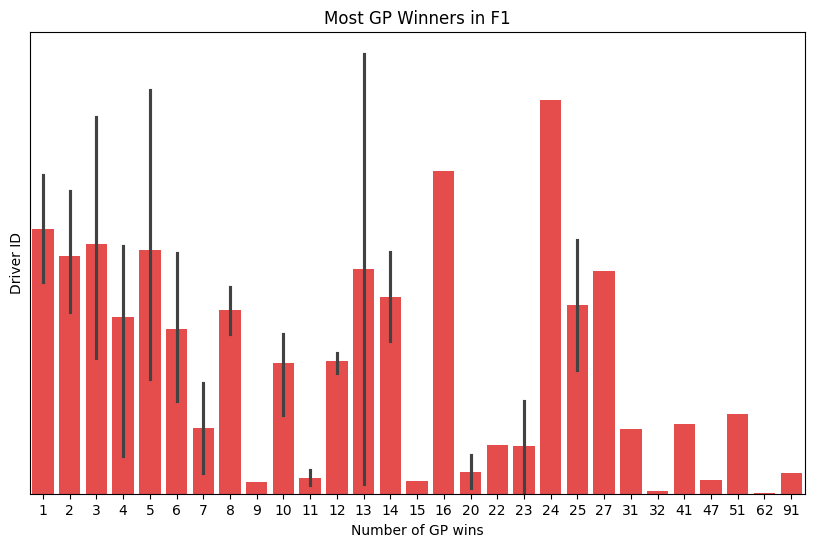

In [143]:

if 'positionOrder' in df.columns:
    driver_winner = df.loc[df['positionOrder'] == 1].groupby('driverId')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

    
    sb.barplot(data=driver_winner, y='driverId', x='positionOrder', color='red', alpha=0.8)
    plt.title('Most GP Winners in F1')
    plt.ylabel('Driver ID')
    plt.xlabel('Number of GP wins')
    plt.yticks([])  
    plt.show()
else:
    print("La colonne 'positionOrder' n'existe toujours pas dans le DataFrame.")


In [76]:
top10Drivers = driver_winner.head(10)

print(top10Drivers)

   driverId  positionOrder
0        30             91
1         1             62
2       117             51
3        20             47
4       102             41
5         4             32
6        95             31
7       328             27
8       182             25
9       373             25


In [142]:
import pandas as pd


df = pd.read_csv(r'W:\Users\HP\OneDrive\Desktop\results.csv', encoding='ISO-8859-1')


drivers_df = pd.read_csv(r'C:\Users\HP\Downloads\drivers.csv', encoding='ISO-8859-1')


if 'positionOrder' in df.columns:
    driver_winner = df.loc[df['positionOrder'] == 1].groupby('driverId')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

   
    driver_winner = driver_winner.merge(drivers_df[['driverId', 'driverRef']], on='driverId', how='left')

    
    top10Drivers = driver_winner.head(10)

   
    print(top10Drivers[['driverRef', 'positionOrder']])
else:
    print("La colonne 'positionOrder' n'existe toujours pas dans le DataFrame.")


            driverRef  positionOrder
0  michael_schumacher             91
1            hamilton             62
2               prost             51
3              vettel             47
4               senna             41
5              alonso             32
6             mansell             31
7             stewart             27
8               lauda             25
9               clark             25


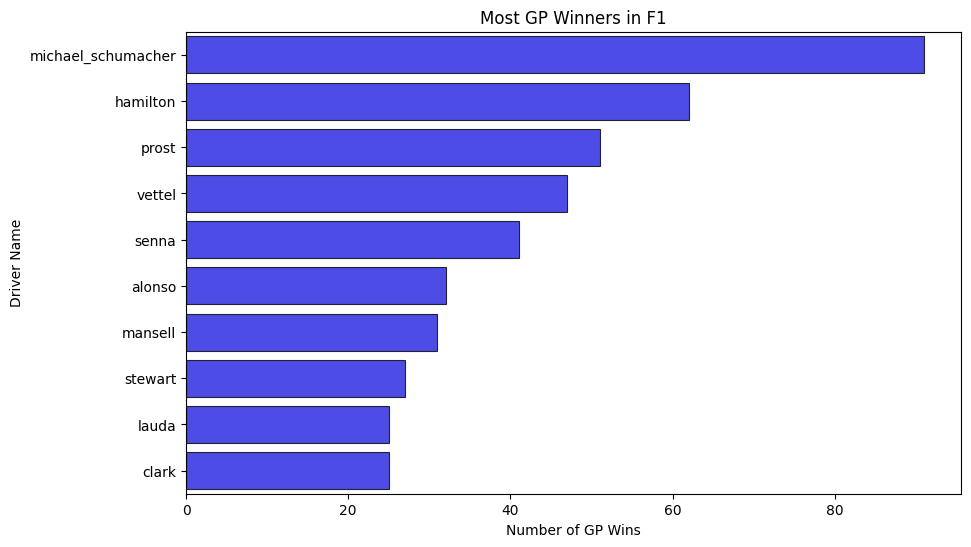

In [102]:
import seaborn as sb
import matplotlib.pyplot as plt


sb.barplot(data=top10Drivers, y='driverRef', x='positionOrder', color='blue', alpha=0.8, linewidth=0.8, edgecolor='black')
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')

plt.show()


Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')
Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url',
       'Unnamed: 5'],
      dtype='object')


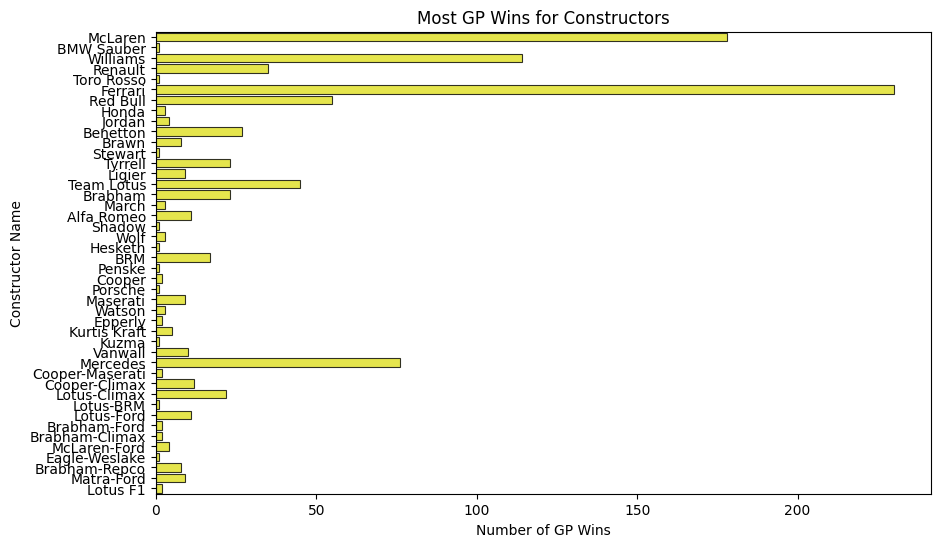

In [141]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


results_df = pd.read_csv(r'W:\Users\HP\OneDrive\Desktop\results.csv', encoding='ISO-8859-1')
constructors_df = pd.read_csv(r'W:\Users\HP\OneDrive\Desktop\constructors.csv', encoding='ISO-8859-1')


print(results_df.columns)
print(constructors_df.columns)


constructor_winner = results_df.loc[results_df['positionOrder'] == 1].groupby('constructorId')['positionOrder'].count().reset_index()


constructor_winner.columns = ['constructorId', 'wins']


constructor_winner = constructor_winner.merge(constructors_df[['constructorId', 'name']], on='constructorId')


sb.barplot(data=constructor_winner, y='name', x='wins', color='yellow', alpha=0.8, linewidth=0.8, edgecolor="black")


plt.title('Most GP Wins for Constructors')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP Wins')


plt.show()


In [140]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


results_df = pd.read_csv(r'W:\Users\HP\OneDrive\Desktop\results.csv', encoding='ISO-8859-1')
constructors_df = pd.read_csv(r'W:\Users\HP\OneDrive\Desktop\constructors.csv', encoding='ISO-8859-1')


constructor_winner = results_df.loc[results_df['positionOrder'] == 1].groupby('constructorId')['positionOrder'].count().reset_index()
constructor_winner.columns = ['constructorId', 'wins']


constructor_winner = constructor_winner.merge(constructors_df[['constructorId', 'name']], on='constructorId')


top10Constructors = constructor_winner.head(10)


print(top10Constructors.columns)


print(top10Constructors[['name', 'wins']])


Index(['constructorId', 'wins', 'name'], dtype='object')
         name  wins
0     McLaren   178
1  BMW Sauber     1
2    Williams   114
3     Renault    35
4  Toro Rosso     1
5     Ferrari   230
6    Red Bull    55
7       Honda     3
8      Jordan     4
9    Benetton    27


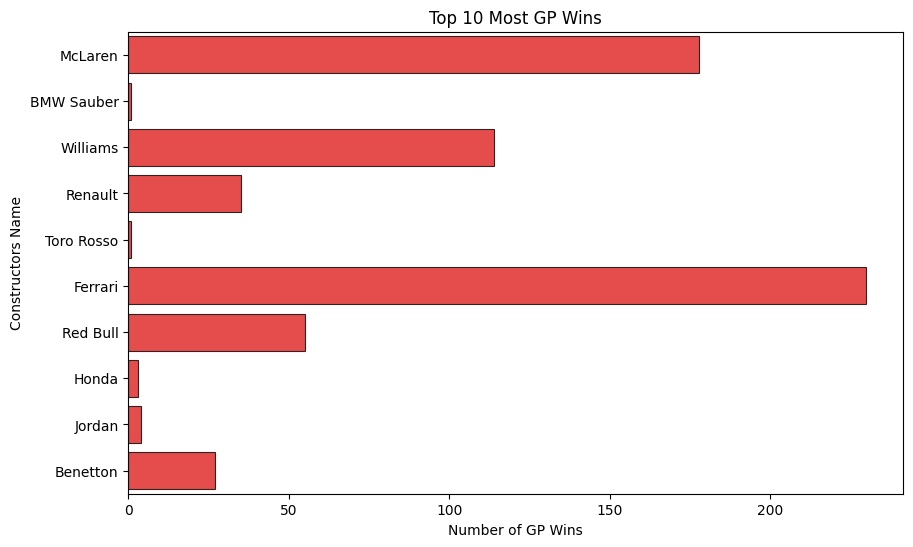

In [139]:
sb.barplot(data=top10Constructors, y='name', x='wins', color='red', alpha=0.8, linewidth=0.8, edgecolor="black")
plt.title('Top 10 Most GP Wins')
plt.ylabel('Constructors Name')
plt.xlabel('Number of GP Wins')


plt.show()

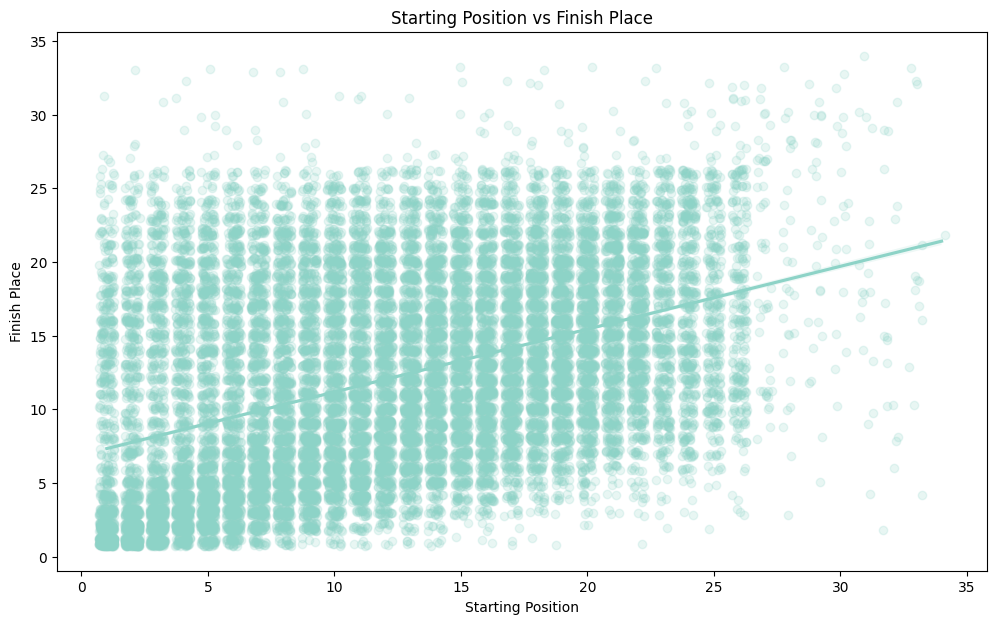

In [127]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df_no_zero = df[df['grid'] != 0]

plt.figure(figsize=[12, 7])
sb.regplot(data=df_no_zero, x='grid', y='positionOrder', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha': 1/5})

plt.title('Starting Position vs Finish Place')
plt.ylabel('Finish Place')
plt.xlabel('Starting Position')

plt.show()


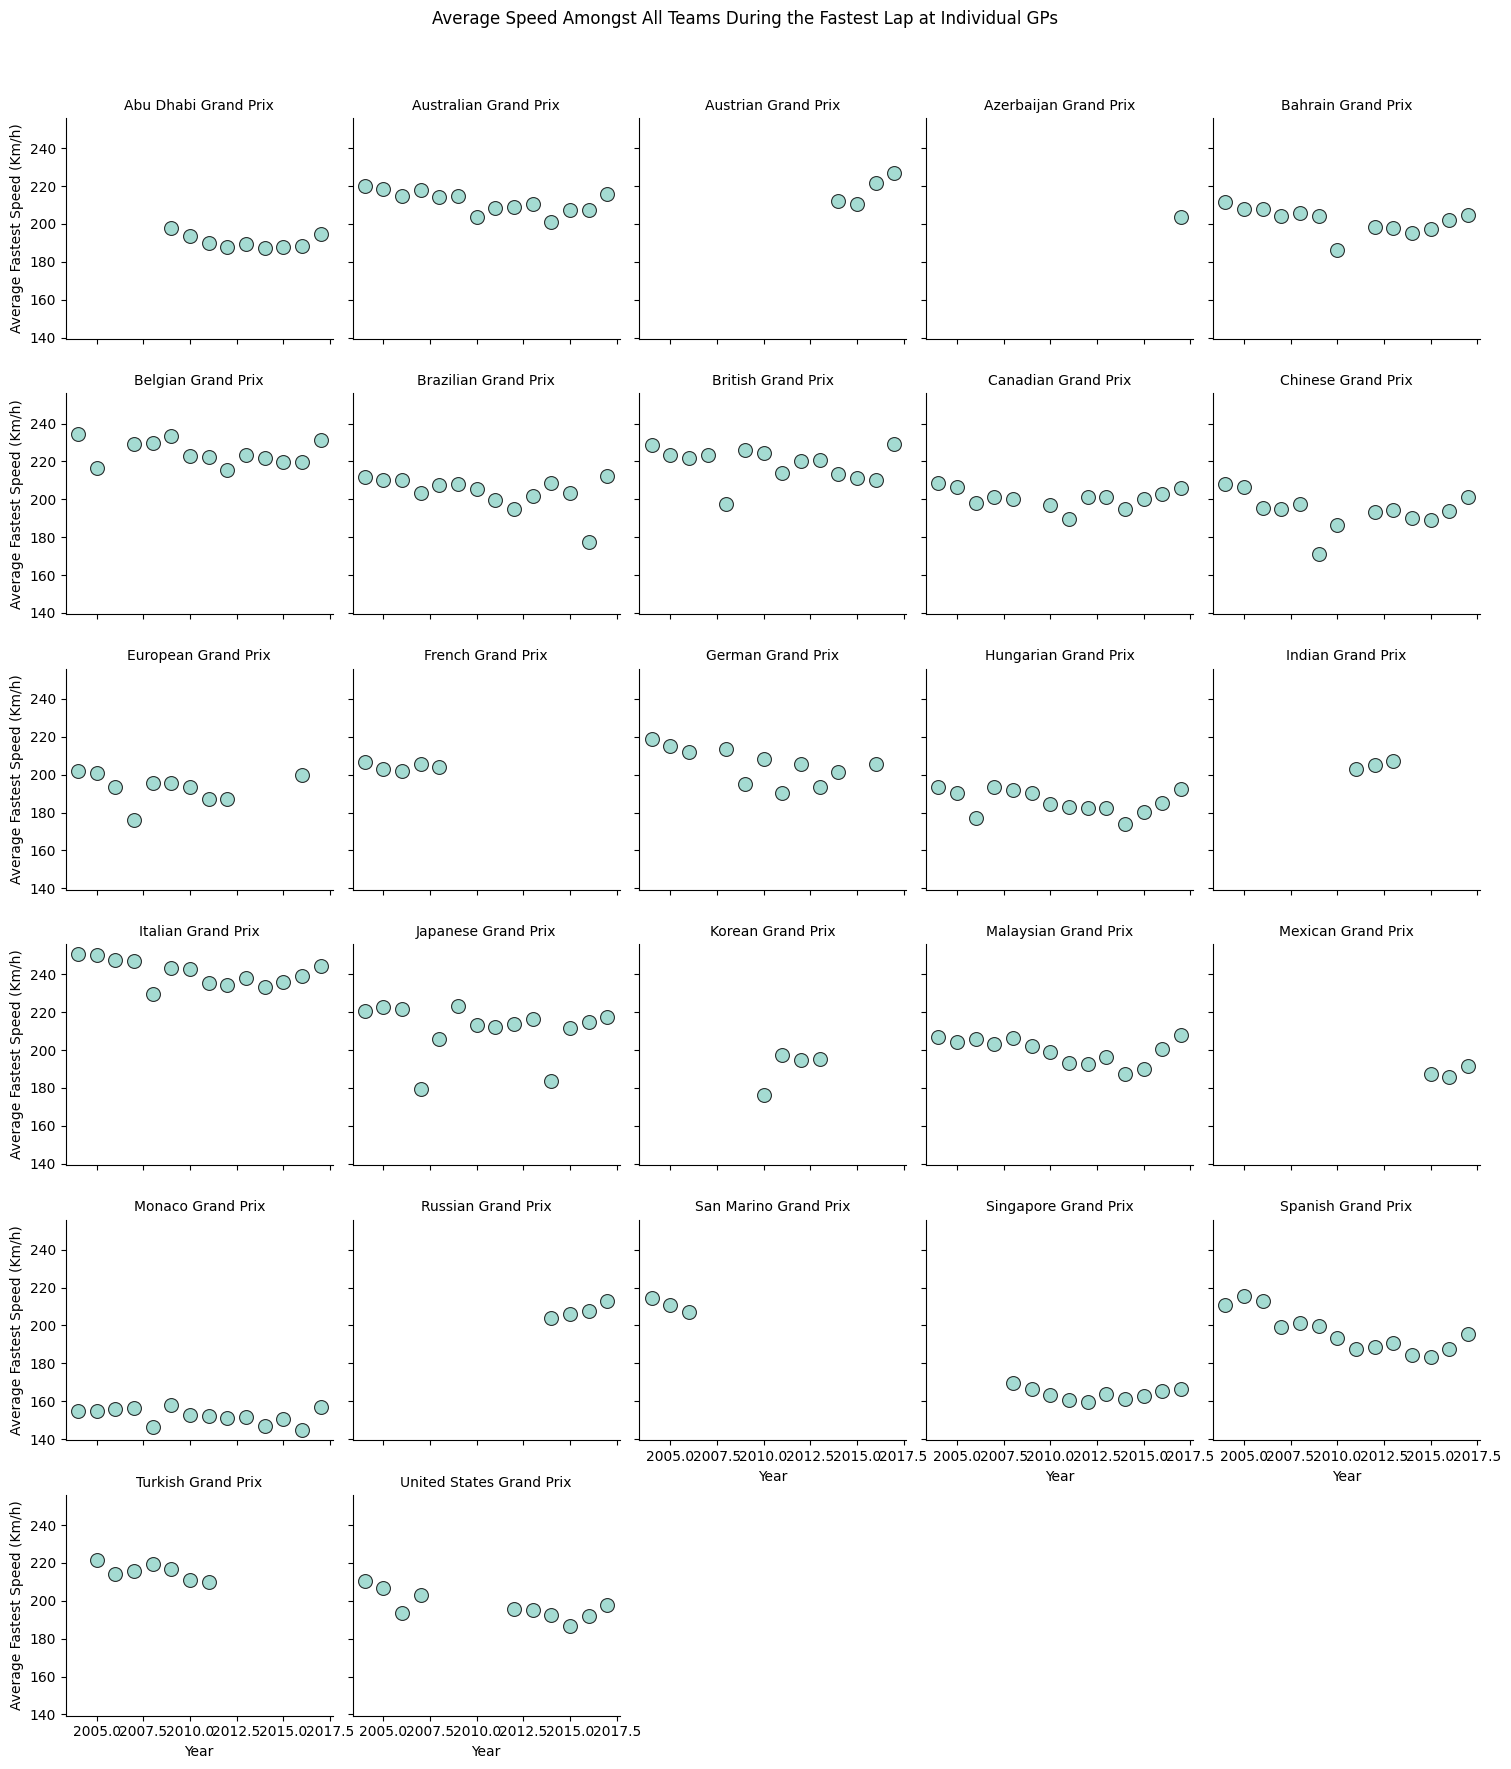

In [138]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


results_df = pd.read_csv(r'W:\Users\HP\OneDrive\Desktop\results.csv', encoding='ISO-8859-1')
races_df = pd.read_csv(r'W:\Users\HP\OneDrive\Desktop\races.csv', encoding='ISO-8859-1')


df = results_df.merge(races_df[['raceId', 'year', 'name']], on='raceId', how='left')


df['fastestLapSpeed'] = pd.to_numeric(df['fastestLapSpeed'], errors='coerce')


df_speed = df[df['year'] >= 2004]


df_group_speed = df_speed.groupby(['name', 'year'])['fastestLapSpeed'].mean().reset_index()


g = sb.FacetGrid(data=df_group_speed, col='name', col_wrap=5)
g.map(plt.scatter, 'year', 'fastestLapSpeed', alpha=0.8, linewidth=0.8, edgecolor="black", s=100)
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average Fastest Speed (Km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average Speed Amongst All Teams During the Fastest Lap at Individual GPs')


plt.show()
